In [1]:
%matplotlib inline

In [2]:
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import numpy.random as rnd

from math import isclose

In [ ]:
""" 
На горизонтне в 2500 дней (10 лет) мы проводим 1000 симуляций финансового пузыря 
Для этого мы пользуемся нормальным распределением с характеристиками экономики России 
(мат. ожидание и дисперсия индекса ММВБ), а также вычисляем на исторических данных ММВБ уровнение тренда
"""

In [3]:
days_count = 2500
days = [i for i in range(days_count + 1)]

In [4]:
trend_func = lambda t: 0.4079 * t + 2500
trend = [trend_func(x) for x in days] 

In [5]:
p_0 = 2226.36

In [6]:
def generate(params, params_s):
    
    """ 
    Функция, генерирующая курс ММВБ по характеристикам экономики, 
    распознает образование финансового пузыря, а также его стадию 
    """
    
    passed_12 = False
    passed_23 = False
    passed_34 = False
    passed_45 = False
    
    needed_success_days = 250
    
    vert = [0, 0, 0, 0]
    passed = [False, False, False, False]
    
    points = [p_0]
    day = 0
    success_days_count = 0
    
    for i in range(1, days_count):
        l_1 = rnd.normal(*params[0])
        p_i = points[i - 1] + l_1
        points.append(p_i)
        p_tr = trend[i]
        
        # Стадия 1: Зарождение 
        # распознается пузырь, если курс ММВБ превышает трендовое значение на 55% 
        # в течение 250 дней (1 года)
        
        if p_i / p_tr > 1.55:
            success_days_count += 1
        else:
            success_days_count = 0
        
        if success_days_count > needed_success_days:
            day = days[i]
            day_12 = day
            passed_12 = True
            passed[0] = passed_12
            vert[0] = day_12
            break
    
    if not passed_12:
        return points, passed, vert
    
    for i in range(day_12, days_count):
        l_2 = rnd.normal(*params[1])
        p_i = points[i - 1] + l_2
        points.append(p_i)
        p_tr = trend[i]
        
        gamma_2 = (p_i / p_tr - 1) * 0.7
        
        # Стадия 2: Надувание
        # игроки рынка начинают активно спекулировать активом
        # пузырь продолжается развиваться до достижения масксимальной степени оптимизма инвесторов
        
        if gamma_2 >= 1:
            day = days[i]
            day_23 = day
            passed_23 = True
            passed[1] = passed_23
            vert[1] = day_23
            break
            
    if not passed_23:
        return points, passed, vert
    
    s = 1
    for i in range(day_23, days_count):
        l_3 = rnd.normal(*params[2])
        p_i = points[i - 1] + l_3
        points.append(p_i)
        p_tr = trend[i]
        
        s += rnd.normal(*params_s)
        
        # Стадия 3: Надувание
        # рынок перенасыщается, пузырь достигает своего максимального значения до тех пор, 
        # пока индекс торговой активности снижается до минимума
        
        if s <= 0:
            day = days[i]
            day_34 = day
            passed_34 = True
            passed[2] = passed_34
            vert[2] = day_34
            break
            
    if not passed_34:
        return points, passed, vert
    
    for i in range(day_34, days_count):
        l_4 = rnd.normal(*params[3])
        p_i = points[i - 1] + l_4
        points.append(p_i)
        p_tr = trend[i]
        
        s += rnd.normal(*params_s)
        
        # Стадия 4: Схлопывание
        # игроки рынка резко начинают продавать актив
        # на рынках паника, ММВБ резко падает до уровня ниже долгосрочного тренда
        
        if p_i <= p_tr:
            day = days[i]
            day_45 = day
            passed_45 = True
            passed[3] = passed_45
            vert[3] = day_45
            break
            
    if not passed_45:
        return points, passed, vert
    
    return points, passed, vert

In [7]:
def plot_stuff(points, passed, vert):
    
    """ Построение графика симуляции финансового пузыря """
    
    plt.plot(days, trend)
    
    y_min = min(trend[0], points[0])
    y_max = max(points)
    plt.plot((vert[0], vert[0]), (y_min, y_max))
    plt.plot((vert[1], vert[1]), (y_min, y_max))
    plt.plot((vert[2], vert[2]), (y_min, y_max))
    plt.plot((vert[3], vert[3]), (y_min, y_max))
    
    length = min(len(days), len(points))
    plt.plot(days[: length], points[: length], linewidth=1)

Average passed: 0.895
Average passed last: 0.002
Average days: 1277.0
Average max P: 8046.910372580267
Average max (Pi/Ptr - 1): 1.4439324815410641


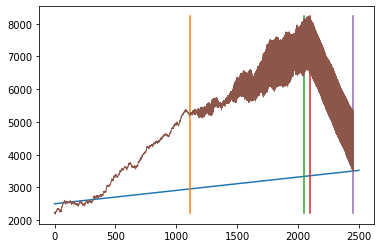

In [8]:
np.random.seed(42)

passed_cnt = 0
passed_3_cnt = 0
days_sum = 0
max_p_sum = 0
max_pi_pr_sum = 0

plotted = False

# Характеристики финансовых пузырей в российской экономике на основе исторических данных
params = [
    (1.87, 18.24),
    (2.58, 27.39),
    (0.61, 28.37),
    (-33.04, 10.24)
]
params_s = (-0.00752, 0.1413)

all_points = list()

for i in range(1000):
    points, passed, vert = generate(params, params_s)
    if passed[0]:
        passed_cnt += 1
    if passed[3]:
        passed_3_cnt += 1
        points_max = max(points)
        points_max_ind = points.index(points_max)
        max_pi_pr_sum += points_max / trend[points_max_ind] - 1
        max_p_sum += points_max
        days_sum += vert[3] - vert[0]
        all_points.append(points)
        
        if not plotted:
            plotted = True
            plot_stuff(points, passed, vert)

            
""" Характеристики финансового пузыря"""

# вероятность возникновения финансового пузыря в ближайшие 10 лет
print('Average passed:', passed_cnt / 1000)

# вероятность схлопывания финансового пузыря в ближайшие 10 лет
print('Average passed last:', passed_3_cnt / 1000)

# средний срок существования финансового пузыря
print('Average days:', days_sum / passed_3_cnt)

# максимальный размер пузыря (цена индекса ММВБ)
print('Average max P:', max_p_sum / passed_3_cnt)

# средний максимум отклонения индекса ММВБ от долгосрочного тренда
print('Average max (Pi/Ptr - 1):', max_pi_pr_sum / passed_3_cnt)
